In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
donnees = pd.read_csv('inria_41003_selfpaced_problem_grade_report_2020-06-02-0932.csv',dtype=str)
donnees

Student ID            Username Final Grade  \
0       9854021              Deewen         0.0   
1       2491543          JeanMarcHa         0.0   
2        935346   ChristelleMariais        0.01   
3        839341              lfarhi        0.02   
4        935202  ThierryParmentelat         0.0   
5       1590534         FRechenmann        0.05   
6        906027      apprenantatfun         0.0   
7       1669686         Osiatis_FUN         0.0   
8       5753203              Erufen         0.0   
9       5581199            rguettaf         0.0   
10       155198            St2phane        0.68   
11      2952539          glmrenard2        0.89   
12        21469          FredGenaux         0.0   
13     10372546               ABOUO         0.0   
14     10795818        badreddine18        0.98   
15      6546721          Belmont888         0.0   
16      7740746            Hmamlouk         0.0   
17        40630    EmmanuelleAyache         0.0   
18      5857517       Carole-Anne92        0.14   
19      8764498      Shannon-Codeur         0.0   
20      8831438   Datura-Stramonium         0.0   
21      3915948            evamoris         0.0   
22     13206496              Nessan         0.0   
23     12705537       lenaicparisot         0.0   
24      1139562    sebastianroussel         0.0   
25      7956626         mraharivelo         0.0   
26        40387      elghaziibrahim         0.0   
27      5507194       LOUAPIVOTREMY         0.0   
28      2315525                pp39        0.33   
29      5474892             JMR1998         0.0   
...         ...                 ...         ...   
9388   13621234            anita_kl        0.04   
9389   17552729              ykondi         0.0   
9390   16702570              sauger         0.0   
9391   17553531             Amnabio         0.0   
9392    6835006             yeshoua         0.0   
9393   16258428        gabrielle241         0.0   
9394    3811476            meirasim         0.0   
9395   17555116            dembdamo         0.0   
9396   16558592       Augustine2705         0.0   
9397    4746951           pougetisa         0.0   
9398   13385629              Coco9_         0.0   
9399   17555618            Akmoussi         0.0   
9400   17040349             Asmaesh         0.0   
9401   17556871           Rihabsaal         0.0   
9402   17556810            ALVAREZA         0.0   
9403   13877392             Angie_B         0.0   
9404   17556899         helloworld2        0.04   
9405   17140840            M-Nadjet         0.0   
9406   16491813                sz40         0.0   
9407   17516851             Missats         0.0   
9408   17557462     GabrielaRezende        0.23   
9409   17552639               Tpl97         0.0   
9410   17557583        AlexandreIac        0.33   
9411   13393564           tsamaille         0.0   
9412   17558571            Armeloic         0.0   
9413   17558804              Inoore         0.0   
9414   17442088           BELLAJmed         0.0   
9415   17559279              Melprt        0.04   
9416   17414427          hudakhalid         0.0   
9417    4525692             RiadS25         0.0   

     Quiz 1: 1.1. La cellule, atome du vivant - Question 1.1.1 (Earned)  \
0                                                   0.0                   
1                                                   NaN                   
2                                                   1.0                   
3                                                   1.0                   
4                                                   0.0                   
5                                                   0.0                   
6                                                   NaN                   
7                                                   NaN                   
8                                                   0.0                   
9                                                   NaN                   
10               

In [8]:
liste_colonne=list(donnees.columns)[3::2]
liste_colonne_fausse=list(donnees.columns)[4::2]
compteur=0
liste=[]
nbr_eleves=donnees.loc[:,"Username"].count()
## Nombre max de points posible pour le Quiz = 20
NbMaxPointQuiz=20
tabl=np.zeros(NbMaxPointQuiz*len(liste_colonne)).reshape(len(liste_colonne),NbMaxPointQuiz)
for col in liste_colonne:
    addition=0
    liste_valeurs=list(donnees.loc[:,col].dropna())
    liste_valeurs_fausse=list(donnees.loc[:,liste_colonne_fausse[compteur]].dropna())
    for i in range(1,NbMaxPointQuiz):
        if liste_valeurs_fausse.count(f"{i}.0")!=0:
            total=liste_valeurs_fausse.count(f"{i}.0")
            liste.append(total)
        tabl[compteur][i]=liste_valeurs.count(f"{i}.0")
        addition+=liste_valeurs.count(f"{i}.0")
    tabl[compteur][0]=total-addition
    compteur=compteur+1
pd.DataFrame(tabl,index=liste_colonne)
semaine=[]
for i in range(19):
    semaine.append("Semaine 1")
for i in range(22):
    semaine.append("Semaine 2")
for i in range(16):
    semaine.append("Semaine 3")
for i in range(16):
    semaine.append("Semaine 4")
for i in range(16):
    semaine.append("Semaine 5")
pourcentage=[f"{int(round((liste[i]/nbr_eleves)*100,0))}%" for i in range(len(liste))]
Id=[i for i in range(1,len(pourcentage)+1)]
pd.DataFrame(np.array([liste,pourcentage,semaine,Id]),
                     index=["Nombre d'élèves","Pourcentage participation","Semaine","Id"],
                     columns=[' '.join(liste_colonne_fausse[i].split()[:-1]) for i in range(len(liste_colonne_fausse))]).T

Nombre d'élèves  \
Quiz 1: 1.1. La cellule, atome du vivant - Ques...            2520   
Quiz 1: 1.1. La cellule, atome du vivant - Ques...            2509   
Quiz 1: 1.1. La cellule, atome du vivant - Ques...            2479   
Quiz 2: 1.2. Au cœur de la cellule, la molécule...            2396   
Quiz 2: 1.2. Au cœur de la cellule, la molécule...            2390   
Quiz 3: 1.3. L’ADN code l’information génétique...            2335   
Quiz 3: 1.3. L’ADN code l’information génétique...            2326   
Quiz 4: 1.4. Qu’est-ce qu’un algorithme ? - Que...            2264   
Quiz 5: 1.5. Compter les nucléotides - Question...            1979   
Quiz 5: 1.5. Compter les nucléotides - Question...            1983   
Quiz 5: 1.5. Compter les nucléotides - Question...            1970   
Quiz 6: 1.6. Contenu en G-C et A-T des séquence...            1884   
Quiz 7: 1.7. Promenade sur l’ADN - Question 1.7.1             1832   
Quiz 8: 1.8. Changer l’échelle du chemin - Ques...            1699   
Quiz 9: 1.9. Prédire l’origine de réplication ?...            1652   
Quiz 10: 1.10. Des fenêtres glissantes et recou...            1576   
Quiz 10: 1.10. Des fenêtres glissantes et recou...            1528   
Quiz 10: 1.10. Des fenêtres glissantes et recou...            1528   
Quiz 10: 1.10. Des fenêtres glissantes et recou...            1556   
Quiz 11: 2.1. La séquence est-elle un bon modèl...            1452   
Quiz 12: 2.2. Les gènes, de Mendel à la biologi...            1401   
Quiz 12: 2.2. Les gènes, de Mendel à la biologi...            1394   
Quiz 12: 2.2. Les gènes, de Mendel à la biologi...            1377   
Quiz 12: 2.2. Les gènes, de Mendel à la biologi...            1391   
Quiz 13: 2.3. Le code génétique - Question 2.3.1              1345   
Quiz 13: 2.3. Le code génétique - Question 2.3.2              1342   
Quiz 13: 2.3. Le code génétique - Question 2.3.3              1354   
Quiz 13: 2.3. Le code génétique - Question 2.3.4              1343   
Quiz 14: 2.4. Un algorithme de traduction - Que...            1290   
Quiz 14: 2.4. Un algorithme de traduction - Que...            1264   
...                                                            ...   
Quiz 32: 4.2. Évolution et similarité de séquen...             992   
Quiz 32: 4.2. Évolution et similarité de séquen...             996   
Quiz 33: 4.3. Quantifier la similarité de deux ...             930   
Quiz 33: 4.3. Quantifier la similarité de deux ...             921   
Quiz 34: 4.4. L’alignement de séquences devient...             916   
Quiz 35: 4.5. Un alignement de séquences vu com...             912   
Quiz 36: 4.6. Si un chemin est optimal, tous se...             901   
Quiz 37: 4.7. Coûts et alignement - Question 4.7.1             878   
Quiz 37: 4.7. Coûts et alignement - Question 4.7.2             893   
Quiz 38: 4.8. Un algorithme récursif - Question...             822   
Quiz 38: 4.8. Un algorithme récursif - Question...            1415   
Quiz 39: 4.9. Eviter la récursivité : une versi...            1378   
Quiz 40: 4.10. Cet algorithme est-il efficace ?...             839   
Quiz 40: 4.10. Cet algorithme est-il efficace ?...             846   
Quiz 41: 5.1. L’arbre des espèces - Question 5.1.1             869   
Quiz 41: 5.1. L’arbre des espèces - Question 5.1.2             876   
Quiz 42: 5.2. L’arbre, objet abstrait - Questio...             863   
Quiz 42: 5.2. L’arbre, objet abstrait - Questio...             867   
Quiz 43: 5.3. Remplir un tableau de distances -...            1404   
Quiz 43: 5.3. Remplir un tableau de distances -...             837   
Quiz 44: 5.4. L’algorithme UPGMA - Question 5.4.1              844   
Quiz 44: 5.4. L’algorithme UPGMA - Question 5.4.2              842   
Quiz 45: 5.5. Quand les différences sont trompe...            1359   
Quiz 45: 5.5. Quand les différences sont trompe...             822   
Quiz 45: 5.5. Quand les différences sont trompe...             811   
Quiz 45: 5.5. Quand les différences sont trompe...           

Participation aux quiz avec le rapport le plus récent


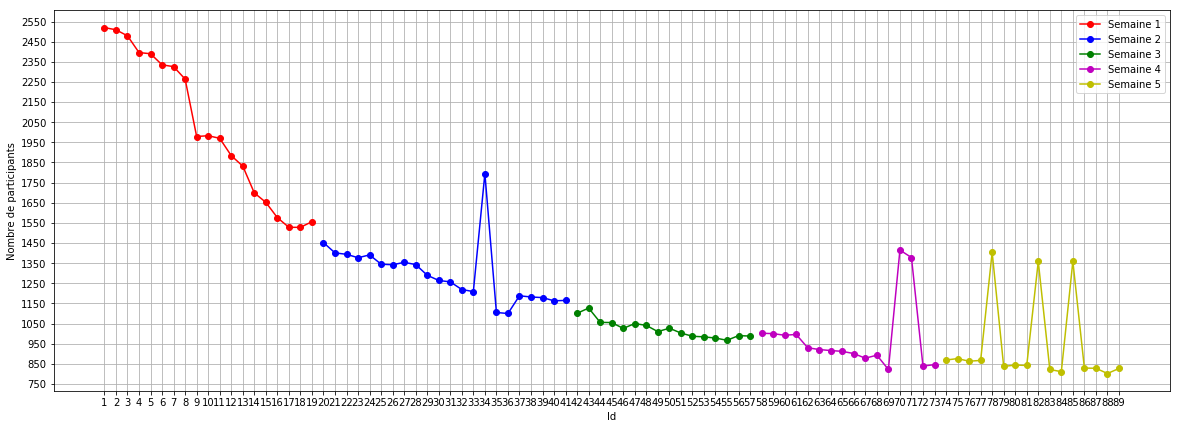

In [26]:
##
tableau=pd.DataFrame(np.array([liste,pourcentage,semaine,Id]),
                     index=["Nombre d'élèves","Pourcentage participation","Semaine","Id"],
                     columns=[' '.join(liste_colonne_fausse[i].split()[:-1]) for i in range(len(liste_colonne_fausse))]).T

## Quiz avec parcours
a=list(tableau.loc[tableau.loc[:,"Semaine"]=="Semaine 1","Nombre d'élèves"])
b=list(tableau.loc[tableau.loc[:,"Semaine"]=="Semaine 2","Nombre d'élèves"])
c=list(tableau.loc[tableau.loc[:,"Semaine"]=="Semaine 3","Nombre d'élèves"])
d=list(tableau.loc[tableau.loc[:,"Semaine"]=="Semaine 4","Nombre d'élèves"])
e=list(tableau.loc[tableau.loc[:,"Semaine"]=="Semaine 5","Nombre d'élèves"])

print("Participation aux quiz avec le rapport le plus récent")
fig,ax=plt.subplots(1,1,figsize=(20,7),sharey='all')
ax.plot(tableau.loc[(tableau.loc[:,"Semaine"]=="Semaine 1") ,"Id"],[float(a[i]) for i in range(len(a))],"ro-")
ax.plot(tableau.loc[(tableau.loc[:,"Semaine"]=="Semaine 2") ,"Id"],[float(b[i]) for i in range(len(b))],"bo-")
ax.plot(tableau.loc[(tableau.loc[:,"Semaine"]=="Semaine 3") ,"Id"],[float(c[i]) for i in range(len(c))],"go-")
ax.plot(tableau.loc[(tableau.loc[:,"Semaine"]=="Semaine 4") ,"Id"],[float(d[i]) for i in range(len(d))],"mo-")
ax.plot(tableau.loc[(tableau.loc[:,"Semaine"]=="Semaine 5") ,"Id"],[float(e[i]) for i in range(len(e))],"yo-")
ax.legend(["Semaine 1","Semaine 2","Semaine 3","Semaine 4","Semaine 5"])
ax.xaxis.set_ticks(range(0,max(Id)))
ax.yaxis.set_ticks(range(750,2600,100))
ax.grid()
plt.xlabel("Id")
plt.ylabel("Nombre de participants")
plt.show()